In [45]:
import numpy as np
from random import uniform as rf
from random import randint as rd
import math

In [46]:
from matplotlib import pyplot as plt
from tqdm import tqdm as tq

In [47]:
import torch.nn as nn
import torch

In [63]:
def get_sample():
    xs = np.empty(0)
    ys = np.empty(0)

    ca = rf(0,2*math.pi)
    change = rf(.05,.15)
    sign=rd(0,1)
    if sign == 0:
        sign = -1
    
    x,y=0,0
    for i in range(200):
        if rf(0,1) < .3:
            ca+=change*sign

        y=y+.1*math.sin(ca)
        x=x+.1*math.cos(ca)

        xs=np.append(xs,x)
        ys=np.append(ys,y)
        
        xs=np.reshape(xs,(len(xs),1))
        ys=np.reshape(ys,(len(ys),1))
    
    values=np.concatenate((xs,ys),axis=1, out=None)
    values=values.astype('float32')
    return values[0:160,:],values[160:200,:]

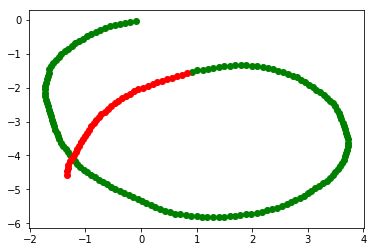

In [74]:
sample_x,sample_y=get_sample()
plt.scatter(sample_x[:,0],sample_x[:,1],c='g')
plt.scatter(sample_y[:,0],sample_y[:,1],c='r')
plt.show()

In [75]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [76]:
input_size = 2
output_size = 2
n_hidden = 10
rnn = RNN(input_size, n_hidden, output_size)

In [ ]:
criterion = nn.MSELoss()
learning_rate = .01

In [ ]:
def train(input, real):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(len(input)):
        predicted, hidden = rnn(input[i], hidden)

    loss = criterion(predicted, real)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return predicted, loss.item()